This notebook is calculating the score of each cell using PCA across teh bands and finding top 10 good and bottom 10 bad cells across the bands

In [1]:
import pandas as pd
import numpy as np
import os
import operator
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:20,.2f}'.format
%matplotlib inline
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'C:\Users\ezchave\Desktop\New_data_rankprct\KM_anon_cell_incidents_all.csv')
df.date = pd.to_datetime(df.date)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458082 entries, 0 to 2458081
Data columns (total 31 columns):
date                                                     datetime64[ns]
ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS                   int64
CALL_SETUP_DELAY_VOLTE_IMS                               int64
DROP_CC_408_VOLTE_IMS                                    int64
DROP_CC_481_VOLTE_IMS                                    int64
DROP_CC_503_VOLTE_IMS                                    int64
DROP_CC_OTHER_VOLTE_IMS                                  int64
DROP_SRVCC_TERMINATE_VOLTE_IMS                           int64
GARBLING_VOLTE_VOICE                                     int64
IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE         int64
MUTING_VOLTE_VOICE                                       int64
SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS                    int64
sum                                                      int64
call_count                                               in

In [4]:
# separate band 2100 cells
df_band2100=df[df.band=="band2100"]

In [5]:
# reset row indexes
df_band2100=df_band2100.reset_index(drop=True)

In [6]:
df_band2100.shape

(1094129, 31)

In [7]:
df_band2100['band'].value_counts()

band2100    1094129
Name: band, dtype: int64

In [8]:
# how many unique cells are there of band 2100
df_band2100['cell_name_anon'].nunique()

4055

In [9]:
# get unique cells 
df_band2100['cell_name_anon'].unique()

array(['cell-5073', 'cell-5074', 'cell-5075', ..., 'cell-9115',
       'cell-9116', 'cell-9117'], dtype=object)

In [10]:
# transfer the start_date to date format 
df_band2100.start_date = pd.to_datetime(df_band2100.start_date) 

In [11]:
# and sort the data by cell_name_anon and date 
df_band2100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094129 entries, 0 to 1094128
Data columns (total 31 columns):
date                                                     1094129 non-null datetime64[ns]
ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS                   1094129 non-null int64
CALL_SETUP_DELAY_VOLTE_IMS                               1094129 non-null int64
DROP_CC_408_VOLTE_IMS                                    1094129 non-null int64
DROP_CC_481_VOLTE_IMS                                    1094129 non-null int64
DROP_CC_503_VOLTE_IMS                                    1094129 non-null int64
DROP_CC_OTHER_VOLTE_IMS                                  1094129 non-null int64
DROP_SRVCC_TERMINATE_VOLTE_IMS                           1094129 non-null int64
GARBLING_VOLTE_VOICE                                     1094129 non-null int64
IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE         1094129 non-null int64
MUTING_VOLTE_VOICE                                       1094129 non-null int6

In [12]:
df_band2100.sort_values(by=['cell_name_anon', 'date'],inplace=True)

In [13]:
print(df_band2100['date'].max()); print(df_band2100['date'].min())

2019-05-26 00:00:00
2018-08-01 00:00:00


In [14]:
# Print the list of dates from teh column "date" so that we know what dates are missing from starting to end 
date_list=df_band2100['date'].unique()
print(date_list)

['2018-08-01T00:00:00.000000000' '2018-08-02T00:00:00.000000000'
 '2018-08-03T00:00:00.000000000' '2018-08-04T00:00:00.000000000'
 '2018-08-05T00:00:00.000000000' '2018-08-06T00:00:00.000000000'
 '2018-08-07T00:00:00.000000000' '2018-08-08T00:00:00.000000000'
 '2018-08-09T00:00:00.000000000' '2018-08-10T00:00:00.000000000'
 '2018-08-11T00:00:00.000000000' '2018-08-12T00:00:00.000000000'
 '2018-08-13T00:00:00.000000000' '2018-08-14T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2018-08-16T00:00:00.000000000'
 '2018-08-17T00:00:00.000000000' '2018-08-18T00:00:00.000000000'
 '2018-08-19T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2018-08-21T00:00:00.000000000' '2018-08-22T00:00:00.000000000'
 '2018-08-23T00:00:00.000000000' '2018-08-24T00:00:00.000000000'
 '2018-08-25T00:00:00.000000000' '2018-08-26T00:00:00.000000000'
 '2018-08-27T00:00:00.000000000' '2018-08-28T00:00:00.000000000'
 '2018-08-29T00:00:00.000000000' '2018-08-30T00:00:00.000000000'
 '2018-08-31T00:00:00.000

# We have data from 01-08-2018 till 26-05-2019, 

In [15]:
df_band2100.head()

,date,ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date,cell_name_anon
35,2018-08-01,2,2,4,3,4,0,0,226,0,41,2,284,1321,261,0.01,0.17,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,band2100,2018-08-01,cell-5073
107,2018-08-02,4,7,0,8,0,2,0,230,0,33,5,289,1227,231,0.01,0.19,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,band2100,2018-08-02,cell-5073
123,2018-08-03,7,17,0,9,1,0,0,245,0,46,5,330,1191,285,0.01,0.21,0.04,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.28,band2100,2018-08-03,cell-5073
36,2018-08-04,8,2,0,4,2,0,0,123,0,12,0,151,594,151,0.01,0.21,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.25,band2100,2018-08-04,cell-5073
16,2018-08-05,4,6,0,3,2,1,0,149,0,27,0,192,675,148,0.01,0.22,0.04,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.28,band2100,2018-08-05,cell-5073


In [16]:
#test_cell_5073=df_band2100[df_band2100.cell_name_anon=="cell-5073"]
test_cell_5073=df_band2100[df_band2100.cell_name_anon=="cell-5073"]

In [17]:
test_cell_5073.shape

(270, 31)

In [18]:
df_band2100.columns

Index(['date', 'ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS',
       'CALL_SETUP_DELAY_VOLTE_IMS', 'DROP_CC_408_VOLTE_IMS',
       'DROP_CC_481_VOLTE_IMS', 'DROP_CC_503_VOLTE_IMS',
       'DROP_CC_OTHER_VOLTE_IMS', 'DROP_SRVCC_TERMINATE_VOLTE_IMS',
       'GARBLING_VOLTE_VOICE',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE',
       'MUTING_VOLTE_VOICE', 'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS', 'sum',
       'call_count', 'est_count_handover', 'sum_drop_cc_503_481',
       'GARBLING_VOLTE_VOICE_norm', 'MUTING_VOLTE_VOICE_norm',
       'DROP_CC_481_VOLTE_IMS_norm', 'CALL_SETUP_DELAY_VOLTE_IMS_norm',
       'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm',
       'ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS_norm',
       'DROP_CC_503_VOLTE_IMS_norm', 'DROP_CC_OTHER_VOLTE_IMS_norm',
       'DROP_CC_408_VOLTE_IMS_norm',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm',
       'DROP_SRVCC_TERMINATE_VOLTE_IMS_norm', 'sum_norm', 'band', 'start_date',
       'cell_name_anon'],
     

In [19]:
grp_dict1= {'ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS' :'sum',
        'CALL_SETUP_DELAY_VOLTE_IMS': 'sum',
        'DROP_CC_408_VOLTE_IMS' : 'sum',
       #'DROP_CC_481_VOLTE_IMS': 'sum',
       #'DROP_CC_503_VOLTE_IMS': 'sum',
       'DROP_CC_OTHER_VOLTE_IMS': 'sum',
       'GARBLING_VOLTE_VOICE': 'sum',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE': 'sum',
       'MUTING_VOLTE_VOICE': 'sum', 
      'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS':  'sum',
       'sum_drop_call_503_481': 'sum',
       'call_count': 'sum'} 

In [20]:
grp_dict1

{'ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS': 'sum',
 'CALL_SETUP_DELAY_VOLTE_IMS': 'sum',
 'DROP_CC_408_VOLTE_IMS': 'sum',
 'DROP_CC_OTHER_VOLTE_IMS': 'sum',
 'GARBLING_VOLTE_VOICE': 'sum',
 'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE': 'sum',
 'MUTING_VOLTE_VOICE': 'sum',
 'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS': 'sum',
 'sum_drop_call_503_481': 'sum',
 'call_count': 'sum'}

In [21]:
features1 = ['ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS', 
            'CALL_SETUP_DELAY_VOLTE_IMS',
       'DROP_CC_408_VOLTE_IMS', 'DROP_CC_OTHER_VOLTE_IMS',
       'GARBLING_VOLTE_VOICE',
       'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE',
       'MUTING_VOLTE_VOICE', 'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS','hard_drop_call_503_481'
       ]

In [22]:

rank_dates=['2018-08-08',
       '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12',
       '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
       '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20',
       '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
       '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
       '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
       '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05',
       '2018-09-06', '2018-09-07', '2018-09-09', '2018-09-10',
       '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
       '2018-09-15', '2018-09-16', '2018-09-17', '2018-09-18',
       '2018-09-19', '2018-09-20', '2018-09-21', '2018-09-22',
       '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26',
       '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30',
       '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
       '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
       '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
       '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20',
       '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24',
       '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28',
       '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04',
       '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12',
       '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16',
       '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20',
       '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
       '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-29',
       '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03',
       '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
       '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
       '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
       '2018-12-16', '2018-12-17', '2018-12-18', '2018-12-19',
       '2018-12-20', '2018-12-21', '2018-12-23', '2018-12-24',
       '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
       '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01',
       '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
       '2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13',
       '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-23',
       '2019-01-24', '2019-01-25', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11',
       '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15',
       '2019-02-16', '2019-02-18', '2019-02-19'
    ]

In [23]:
df.head()

,date,ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS,CALL_SETUP_DELAY_VOLTE_IMS,DROP_CC_408_VOLTE_IMS,DROP_CC_481_VOLTE_IMS,DROP_CC_503_VOLTE_IMS,DROP_CC_OTHER_VOLTE_IMS,DROP_SRVCC_TERMINATE_VOLTE_IMS,GARBLING_VOLTE_VOICE,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE,MUTING_VOLTE_VOICE,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS,sum,call_count,est_count_handover,sum_drop_cc_503_481,GARBLING_VOLTE_VOICE_norm,MUTING_VOLTE_VOICE_norm,DROP_CC_481_VOLTE_IMS_norm,CALL_SETUP_DELAY_VOLTE_IMS_norm,SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS_norm,ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS_norm,DROP_CC_503_VOLTE_IMS_norm,DROP_CC_OTHER_VOLTE_IMS_norm,DROP_CC_408_VOLTE_IMS_norm,IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE_norm,DROP_SRVCC_TERMINATE_VOLTE_IMS_norm,sum_norm,band,start_date,cell_name_anon
0,2018-08-01,1,1,0,13,1,0,0,269,0,34,1,320,442,85,0.03,0.61,0.08,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,band1900_1,2018-08-01,cell-1
1,2019-05-24,5,3,0,0,0,0,0,106,0,21,1,136,463,169,0.00,0.23,0.05,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.29,band1900_1,2019-05-24,cell-1
2,2018-08-05,0,0,0,3,0,0,0,162,1,11,2,179,320,51,0.01,0.51,0.03,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.56,band1900_1,2018-08-05,cell-1
3,2019-05-23,8,1,0,3,2,0,0,114,0,17,0,145,514,151,0.01,0.22,0.03,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.28,band1900_1,2019-05-23,cell-1
4,2018-12-02,14,1,0,7,1,0,0,166,0,14,1,204,406,109,0.02,0.41,0.03,0.02,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.50,band1900_1,2018-12-02,cell-1


In [24]:
def Rolling_data_PCA_Percentile(df,rank_dates, nr_days, features):
    # output path
    Output_path='C:\My_work\MXE\CM_Config\output'
    dates = df.date.unique()
    dates = sorted(dates)
    for i in range(len(dates)):
        #test_dates[i] = date(test_dates[i])
        dates[i] = pd.to_datetime(dates[i])
        dates[i] = dates[i].strftime('%Y-%m-%d')
    # Coverting date column to datetime datatype
    #df.date = pd.to_datetime(df.date)
    dates1 = df.date
    # creating Blank data frames for storing the output of the iterations 
    rolledup_data=pd.DataFrame(columns=["ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS","CALL_SETUP_DELAY_VOLTE_IMS",
                                        "DROP_CC_408_VOLTE_IMS","DROP_CC_OTHER_VOLTE_IMS","GARBLING_VOLTE_VOICE",
                                        "IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE","MUTING_VOLTE_VOICE",
                                        "SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS","hard_drop_call_503_481",
                                        "cell_name_anon","band","date"])

    final_df_band2100 = pd.DataFrame(columns=["cell_name_anon","band","score","date","rank","percentile"])
    final_df_band700 = pd.DataFrame(columns=["cell_name_anon","band","score","date","rank","percentile"])
   # final_df_band1900_1 = pd.DataFrame(columns=["cell_name_anon","band","score","date","rank","percentile"])
        
    for rank_date in rank_dates:
        # coverting rank_date string to date 
        this_date = rank_date
        #rank_date = dt.date(*map(int, rank_date.split('-')))
        print(rank_date)
        # Preparing the window for 7 days
        
        #start_date = rank_date - dt.timedelta(1)
        #end_date = start_date - dt.timedelta(nr_days)
        #rank_date = '2019-03-01T00:00:00.000000000'
        #this_date = np.datetime64(this_date)
        i = dates.index(this_date)
        start_date = dates[i-1]
        end_date = dates[i-nr_days]
        #print(df['date'].head(2))
        dff = df[(df['date'] < rank_date) & (df['date'] >= end_date)]
        # CHANGE MADE HERE
        dff['hard_drop_call_503_481']= dff['DROP_CC_481_VOLTE_IMS']+ dff['DROP_CC_503_VOLTE_IMS']
         # CHNAGE MADE HERE
        # grouping by cell_name_anon , band
        grp_dict1= {'ACCESS_FAILURE_CC_503.1.223._VOLTE_IMS' :'sum',
            'CALL_SETUP_DELAY_VOLTE_IMS': 'sum',
            'DROP_CC_408_VOLTE_IMS' : 'sum',
           'DROP_CC_OTHER_VOLTE_IMS': 'sum',
           'GARBLING_VOLTE_VOICE': 'sum',
           'IMMEDIATE_VOLUNTARY_DROP_DUE_TO_MEDIA_STOP_VOLTE': 'sum',
           'MUTING_VOLTE_VOICE': 'sum', 
           'SOFT_DROP_DUE_TO_MEDIA_STOP_VOLTE_IMS':  'sum',
           'hard_drop_call_503_481': 'sum',
           'call_count': 'sum'} 
    
        df1 = dff.groupby(['cell_name_anon','band']).agg(grp_dict1 , as_index = False)
    
        df1.reset_index(inplace=True)
    
        df2= df1.iloc[:,2:].div(df1.call_count, axis=0)
    
        df3 = pd.concat([df2.iloc[:,0:9], df1[['cell_name_anon','band']]], axis = 1)
        
        df3['date']=rank_date
        
         # append all iterations
        rolledup_data=rolledup_data.append(df3,ignore_index = True)
    
        ##########################################
        # ----------------Band 2100---------- ####
        ##########################################
        # Separating out the features
        df_band2100 = df3[df3.band == 'band2100']
        df_band2100.reset_index(inplace = True)
        x = df_band2100.loc[:, features1].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)
        # doing PCA
        pca = PCA()
        principalComponents = pca.fit_transform(x)
        # converting to dataframe
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5', 'principal component 6',
                         'principal component 7','principal component 8', 'principal component 9'
                          ])
        # selecting where explained variance >= 1
        exp_variance = pca.explained_variance_
        # fetching indexes
        idx = np.where(exp_variance >= 1)[0]
        #print(idx) ; print(type(idx[0]))
        #fetching multipliers
        exp_ratio = pca.explained_variance_ratio_[idx]
        # slicing Principal components and adding cell_name_anon & band
        cols=['cell_name_anon', 'band']
        _df_band2100 =  pd.concat([principalDf.iloc[:,idx], df_band2100[cols]], axis = 1)
        _df_band2100['score'] = np.sum(_df_band2100.iloc[:,idx] * exp_ratio , axis = 1)
        _df_band2100['date'] = rank_date
        _df_band2100.sort_values(by=['score'],ascending=True , inplace=True)
        _df_band2100.reset_index(inplace= True)
        _df_band2100['rank'] = _df_band2100.index.values+1
        _df_band2100 = _df_band2100[['cell_name_anon','band','score','date','rank']]
        
        _df_band2100['percentile'] = _df_band2100.score.rank(pct = True)
        _df_band2100.percentile = 1 - _df_band2100.percentile 
        _df_band2100.percentile = _df_band2100.percentile * 100
              
        # append all iterations
        final_df_band2100=_df_band2100.append(final_df_band2100,ignore_index = True)
        #print('success')
        print(final_df_band2100.head(2))
               
        ##########################################
        # ----------------Band 700---------- ####
        ##########################################
        # Separating out the features
        df_band700 = df3[df3.band == 'band700']
        df_band700.reset_index(inplace = True)
        x = df_band700.loc[:, features1].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)
        # doing PCA
        pca = PCA()
        principalComponents = pca.fit_transform(x)
        # converting to dataframe
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5', 'principal component 6',
                         'principal component 7','principal component 8', 'principal component 9'
                          ])
        # selecting where explained variance >= 1
        exp_variance = pca.explained_variance_
        # fetching indexes
        idx = np.where(exp_variance >= 1)[0]
        #print(idx) ; print(type(idx[0]))
        #fetching multipliers
        exp_ratio = pca.explained_variance_ratio_[idx]
        # slicing Principal components and adding cell_name_anon & band
        cols=['cell_name_anon', 'band']
        _df_band700 =  pd.concat([principalDf.iloc[:,idx], df_band700[cols]], axis = 1)
        _df_band700['score'] = np.sum(_df_band700.iloc[:,idx] * exp_ratio , axis = 1)
        _df_band700['date'] = rank_date
        _df_band700.sort_values(by=['score'],ascending=True , inplace=True)
        _df_band700.reset_index(inplace= True)
        _df_band700['rank'] = _df_band700.index.values+1
        _df_band700 = _df_band700[['cell_name_anon','band','score','date','rank']]
        _df_band700['percentile'] = _df_band700.score.rank(pct = True)
        _df_band700.percentile = 1 - _df_band700.percentile 
        _df_band700.percentile = _df_band700.percentile * 100
        
        # append all iterations
        final_df_band700=_df_band700.append(final_df_band700,ignore_index = True)
        #print('success')
        print(final_df_band700.head(2))
        
    return final_df_band2100,final_df_band700, rolledup_data  

In [25]:
def apply_PCA_on_period(k,start_date):
    # k for mean +- k*std
    #start_date = '2019-05-11'
    dates = df.date.unique()
    dates = sorted(dates)
    start_date = np.datetime64(start_date)
    i = dates.index(start_date)
    test_dates = dates[i-29:i+1]
    build_dates = dates[i-119:i-29]
    for i in range(len(test_dates)):
        #test_dates[i] = date(test_dates[i])
        test_dates[i] = pd.to_datetime(test_dates[i])
        test_dates[i] = test_dates[i].strftime('%Y-%m-%d')
    for i in range(len(build_dates)):
        #test_dates[i] = date(test_dates[i])
        build_dates[i] = pd.to_datetime(build_dates[i])
        build_dates[i] = build_dates[i].strftime('%Y-%m-%d')
    print(test_dates)
    #make the df for first 13 weeks
    Consolidated_df_2100_build,Consolidated_df_700_build, Consolidated_data_all_build = Rolling_data_PCA_Percentile(df, build_dates, 7, features1)
    #make the df for the one month of test
    Consolidated_df_2100_test,Consolidated_df_700_test, Consolidated_data_all_test = Rolling_data_PCA_Percentile(df,test_dates, 7, features1)
    print('PCA done \n')
    
    return Consolidated_df_2100_build,Consolidated_df_2100_test

In [26]:
def calculate_performance(Consolidated_df_2100_build,Consolidated_df_2100_test,k):
    cell_rank = Consolidated_df_2100_build[['cell_name_anon','score','rank']]
    cell_rank['rank'] = cell_rank['rank'].astype(int)
    cell_rank_mean = cell_rank.groupby('cell_name_anon').mean()
    cell_rank_mean.reset_index(inplace = True)
    cell_rank_std = cell_rank.groupby('cell_name_anon').std()
    cell_rank_std.reset_index(inplace = True)
    #cell_rank_std.head()
    cell_rank_mean['score_std'] = cell_rank_std.score
    cell_rank_mean['rank_std'] = cell_rank_std['rank']
    cell_rank_mean.rename(columns = {'score' : 'score_mean_90days','rank':'rank_mean'},inplace = True)
    cell_rank_mean.head()
    cell_score_mean = cell_rank_mean.copy()
    del(cell_rank_mean)
    cell_score_mean['mu+sigma'] = cell_score_mean['score_mean_90days'] + (k*cell_score_mean['score_std'])
    cell_score_mean['mu-sigma'] = cell_score_mean['score_mean_90days'] - (k*cell_score_mean['score_std'])
    
    print('cell ranking for build period done \n')
    # getting the mean of the best days of cell and standard deviation for all the days in the build period

    Consolidated_df_2100_build = pd.merge(Consolidated_df_2100_build,cell_score_mean[['cell_name_anon','score_std','score_mean_90days','mu+sigma','mu-sigma']],how='inner',on='cell_name_anon')
    Consolidated_df_2100_build['gt_mu+sigma'] = Consolidated_df_2100_build['score'] > Consolidated_df_2100_build['mu+sigma']
    Consolidated_df_2100_build['lt_mu-sigma'] = Consolidated_df_2100_build['score'] < Consolidated_df_2100_build['mu+sigma']
    Consolidated_df_2100_build = Consolidated_df_2100_build.sort_values(by=['cell_name_anon','date'])
    
    cell_best_days = Consolidated_df_2100_build[Consolidated_df_2100_build['lt_mu-sigma']==True]
    x = cell_best_days[['cell_name_anon','score']].groupby('cell_name_anon').mean()
    
    x.reset_index(inplace=True)
    y = Consolidated_df_2100_build[['cell_name_anon','score']].groupby('cell_name_anon').std()
    y.reset_index(inplace=True)
    #Consolidated_df_2100_build = pd.merge(Consolidated_df_2100_build,x[['cell_name_anon','score']],on='cell_name_anon',how='inner')

    del(cell_best_days)
    
    print('cell mean and standard deviation calculation done \n')

    cell_mean_std = pd.merge(x,y,on='cell_name_anon',how='inner')
    cell_mean_std.rename(columns ={'score_x':'score_mean_good_days','score_y':'score_std_90days'},inplace=True)
    Consolidated_df_2100_build = pd.merge(Consolidated_df_2100_build,cell_mean_std[['cell_name_anon','score_mean_good_days']],on='cell_name_anon',how='inner')
    Consolidated_df_2100_test= pd.merge(Consolidated_df_2100_test,cell_mean_std,how='inner',on='cell_name_anon')
    Consolidated_df_2100_test.sort_values(by=['cell_name_anon','date'],inplace=True)
    Consolidated_df_2100_test.reset_index(inplace=True,drop=True)
    Consolidated_df_2100_test = pd.merge(Consolidated_df_2100_test,cell_score_mean[['cell_name_anon','score_mean_90days']],how='inner',on='cell_name_anon')
    #print(cell_score_mean.head())
    del(cell_score_mean)
    Consolidated_df_2100_test['mu+'+str(k)+'sigma'] = Consolidated_df_2100_test['score_mean_good_days'] + (k*Consolidated_df_2100_test['score_std_90days'])
    Consolidated_df_2100_test['mu-'+str(k)+'sigma'] = Consolidated_df_2100_test['score_mean_good_days'] - (k*Consolidated_df_2100_test['score_std_90days'])
    Consolidated_df_2100_test['gt_mu+'+str(k)+'sigma'] = Consolidated_df_2100_test['score'] > Consolidated_df_2100_test['mu+'+str(k)+'sigma']
    Consolidated_df_2100_test['lt_mu-'+str(k)+'sigma'] = Consolidated_df_2100_test['score'] < Consolidated_df_2100_test['mu-'+str(k)+'sigma']
    #Consolidated_df_2100_test.head()
    Consolidated_df_2100_test.rename(columns={'score':'mean_score_90days'},inplace=True)
    print('cell mean +- sigma calculation done for test period')
    print(Consolidated_df_2100_test.head())
    return Consolidated_df_2100_test,Consolidated_df_2100_build

In [27]:
sorted(df.date.unique())

[numpy.datetime64('2018-08-01T00:00:00.000000000'),
 numpy.datetime64('2018-08-02T00:00:00.000000000'),
 numpy.datetime64('2018-08-03T00:00:00.000000000'),
 numpy.datetime64('2018-08-04T00:00:00.000000000'),
 numpy.datetime64('2018-08-05T00:00:00.000000000'),
 numpy.datetime64('2018-08-06T00:00:00.000000000'),
 numpy.datetime64('2018-08-07T00:00:00.000000000'),
 numpy.datetime64('2018-08-08T00:00:00.000000000'),
 numpy.datetime64('2018-08-09T00:00:00.000000000'),
 numpy.datetime64('2018-08-10T00:00:00.000000000'),
 numpy.datetime64('2018-08-11T00:00:00.000000000'),
 numpy.datetime64('2018-08-12T00:00:00.000000000'),
 numpy.datetime64('2018-08-13T00:00:00.000000000'),
 numpy.datetime64('2018-08-14T00:00:00.000000000'),
 numpy.datetime64('2018-08-15T00:00:00.000000000'),
 numpy.datetime64('2018-08-16T00:00:00.000000000'),
 numpy.datetime64('2018-08-17T00:00:00.000000000'),
 numpy.datetime64('2018-08-18T00:00:00.000000000'),
 numpy.datetime64('2018-08-19T00:00:00.000000000'),
 numpy.datet

In [28]:
pca_build,pca_test = apply_PCA_on_period(0.5,'2019-02-19') # last date must be after 120 days of data 
# need to calculate for all the months one by one so that we can compare performance of each month
#change the last date and run everything following again 
test_k05,build_k05 = calculate_performance(pca_build,pca_test,0.5)
test_k1,build_k1 = calculate_performance(pca_build,pca_test,1)
test_k15,build_k15 = calculate_performance(pca_build,pca_test,1.5)
test_k2,build_k2 = calculate_performance(pca_build,pca_test,2)
test_k25,build_k25 = calculate_performance(pca_build,pca_test,2.5)
test_k3,build_k3 = calculate_performance(pca_build,pca_test,3)


['2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-27', '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-18', '2019-02-19']
2018-10-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7563  band2100                -1.30  2018-10-08    1   
1      cell-7656  band2100                -0.92  2018-10-08    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3028  band700                -1.10  2018-10-08    1   
1      cell-3983  band700                -1.07  2018-10-08    2   

            percentile  
0                99.97  
1                99.93  
2018-10-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8754  band2100                -0.51  2018-10-09    1   
1      cell-6500  band2100                -0.50  2018-10-09    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3213  band700                -1.12  2018-10-09    1   
1      cell-3028  band700                -1.11  2018-10-09    2   

            percentile  
0                99.97  
1                99.93  
2018-10-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5999  band2100                -0.70  2018-10-10    1   
1      cell-8012  band2100                -0.66  2018-10-10    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3213  band700                -1.15  2018-10-10    1   
1      cell-4249  band700                -1.07  2018-10-10    2   

            percentile  
0                99.97  
1                99.93  
2018-10-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5733  band2100                -0.64  2018-10-11    1   
1      cell-7455  band2100                -0.62  2018-10-11    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.21  2018-10-11    1   
1      cell-3213  band700                -1.06  2018-10-11    2   

            percentile  
0                99.97  
1                99.93  
2018-10-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.85  2018-10-12    1   
1      cell-7147  band2100                -0.79  2018-10-12    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.10  2018-10-12    1   
1      cell-2639  band700                -1.04  2018-10-12    2   

            percentile  
0                99.97  
1                99.93  
2018-10-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.85  2018-10-13    1   
1      cell-6465  band2100                -0.73  2018-10-13    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.02  2018-10-13    1   
1      cell-2210  band700                -1.00  2018-10-13    2   

            percentile  
0                99.97  
1                99.93  
2018-10-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.84  2018-10-14    1   
1      cell-8705  band2100                -0.77  2018-10-14    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.02  2018-10-14    1   
1      cell-4486  band700                -1.00  2018-10-14    2   

            percentile  
0                99.97  
1                99.93  
2018-10-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.80  2018-10-15    1   
1      cell-8705  band2100                -0.77  2018-10-15    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4394  band700                -1.00  2018-10-15    1   
1      cell-2210  band700                -0.98  2018-10-15    2   

            percentile  
0                99.97  
1                99.93  
2018-10-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.93  2018-10-16    1   
1      cell-8705  band2100                -0.81  2018-10-16    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4008  band700                -1.02  2018-10-16    1   
1      cell-4620  band700                -1.01  2018-10-16    2   

            percentile  
0                99.97  
1                99.93  
2018-10-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -0.97  2018-10-17    1   
1      cell-8705  band2100                -0.75  2018-10-17    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4394  band700                -1.04  2018-10-17    1   
1      cell-3593  band700                -1.00  2018-10-17    2   

            percentile  
0                99.97  
1                99.93  
2018-10-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -1.05  2018-10-18    1   
1      cell-8705  band2100                -0.71  2018-10-18    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3308  band700                -1.00  2018-10-18    1   
1      cell-3138  band700                -1.00  2018-10-18    2   

            percentile  
0                99.97  
1                99.93  
2018-10-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -1.09  2018-10-19    1   
1      cell-8766  band2100                -0.93  2018-10-19    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2639  band700                -1.66  2018-10-19    1   
1      cell-3591  band700                -1.35  2018-10-19    2   

            percentile  
0                99.97  
1                99.93  
2018-10-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -1.50  2018-10-20    1   
1      cell-7831  band2100                -1.09  2018-10-20    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-5061  band700                -1.11  2018-10-20    1   
1      cell-3593  band700                -1.11  2018-10-20    2   

            percentile  
0                99.97  
1                99.93  
2018-10-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -1.41  2018-10-21    1   
1      cell-7831  band2100                -1.01  2018-10-21    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3138  band700                -1.12  2018-10-21    1   
1      cell-2688  band700                -1.10  2018-10-21    2   

            percentile  
0                99.97  
1                99.93  
2018-10-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9026  band2100                -1.24  2018-10-22    1   
1      cell-7831  band2100                -0.75  2018-10-22    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2688  band700                -1.13  2018-10-22    1   
1      cell-3737  band700                -1.09  2018-10-22    2   

            percentile  
0                99.97  
1                99.93  
2018-10-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7640  band2100                -0.77  2018-10-23    1   
1      cell-9043  band2100                -0.72  2018-10-23    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2688  band700                -1.06  2018-10-23    1   
1      cell-2266  band700                -1.06  2018-10-23    2   

            percentile  
0                99.97  
1                99.93  
2018-10-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -0.77  2018-10-24    1   
1      cell-5590  band2100                -0.77  2018-10-24    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3218  band700                -1.27  2018-10-24    1   
1      cell-3138  band700                -1.11  2018-10-24    2   

            percentile  
0                99.97  
1                99.93  
2018-10-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7147  band2100                -0.68  2018-10-25    1   
1      cell-5590  band2100                -0.64  2018-10-25    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.10  2018-10-25    1   
1      cell-2688  band700                -1.09  2018-10-25    2   

            percentile  
0                99.97  
1                99.93  
2018-10-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7147  band2100                -0.71  2018-10-26    1   
1      cell-5590  band2100                -0.70  2018-10-26    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3728  band700                -1.52  2018-10-26    1   
1      cell-3741  band700                -1.51  2018-10-26    2   

            percentile  
0                99.97  
1                99.93  
2018-10-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8756  band2100                -0.79  2018-10-27    1   
1      cell-6334  band2100                -0.70  2018-10-27    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2639  band700                -1.71  2018-10-27    1   
1      cell-3741  band700                -1.60  2018-10-27    2   

            percentile  
0                99.97  
1                99.93  
2018-10-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -0.69  2018-10-28    1   
1      cell-5590  band2100                -0.64  2018-10-28    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2639  band700                -1.60  2018-10-28    1   
1      cell-2266  band700                -1.45  2018-10-28    2   

            percentile  
0                99.97  
1                99.93  
2018-11-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -0.58  2018-11-01    1   
1      cell-8756  band2100                -0.54  2018-11-01    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.11  2018-11-01    1   
1      cell-3138  band700                -1.02  2018-11-01    2   

            percentile  
0                99.97  
1                99.93  
2018-11-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9118  band2100                -1.23  2018-11-02    1   
1      cell-6334  band2100                -0.74  2018-11-02    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.76  2018-11-02    1   
1      cell-4384  band700                -0.72  2018-11-02    2   

            percentile  
0                99.97  
1                99.93  
2018-11-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9118  band2100                -1.34  2018-11-03    1   
1      cell-6334  band2100                -0.82  2018-11-03    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.76  2018-11-03    1   
1      cell-3022  band700                -0.71  2018-11-03    2   

            percentile  
0                99.97  
1                99.93  
2018-11-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9118  band2100                -0.95  2018-11-04    1   
1      cell-5999  band2100                -0.79  2018-11-04    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3836  band700                -0.96  2018-11-04    1   
1      cell-2260  band700                -0.71  2018-11-04    2   

            percentile  
0                99.97  
1                99.93  
2018-11-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9042  band2100                -1.43  2018-11-05    1   
1      cell-6334  band2100                -0.77  2018-11-05    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4620  band700                -1.11  2018-11-05    1   
1      cell-3553  band700                -1.07  2018-11-05    2   

            percentile  
0                99.97  
1                99.93  
2018-11-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.54  2018-11-06    1   
1      cell-8799  band2100                -1.06  2018-11-06    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3836  band700                -0.90  2018-11-06    1   
1      cell-2473  band700                -0.70  2018-11-06    2   

            percentile  
0                99.97  
1                99.93  
2018-11-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -0.62  2018-11-07    1   
1      cell-6867  band2100                -0.49  2018-11-07    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3107  band700                -0.75  2018-11-07    1   
1      cell-2266  band700                -0.75  2018-11-07    2   

            percentile  
0                99.97  
1                99.93  
2018-11-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -0.54  2018-11-08    1   
1      cell-9022  band2100                -0.52  2018-11-08    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3593  band700                -0.71  2018-11-08    1   
1      cell-3107  band700                -0.71  2018-11-08    2   

            percentile  
0                99.97  
1                99.93  
2018-11-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9022  band2100                -0.67  2018-11-09    1   
1      cell-9125  band2100                -0.63  2018-11-09    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4620  band700                -1.41  2018-11-09    1   
1      cell-2366  band700                -1.32  2018-11-09    2   

            percentile  
0                99.97  
1                99.93  
2018-11-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -0.79  2018-11-10    1   
1      cell-5590  band2100                -0.75  2018-11-10    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.10  2018-11-10    1   
1      cell-4007  band700                -1.03  2018-11-10    2   

            percentile  
0                99.97  
1                99.93  
2018-11-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7153  band2100                -1.18  2018-11-11    1   
1      cell-5162  band2100                -0.94  2018-11-11    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.12  2018-11-11    1   
1      cell-2472  band700                -1.04  2018-11-11    2   

            percentile  
0                99.97  
1                99.93  
2018-11-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7663  band2100                -0.82  2018-11-12    1   
1      cell-6334  band2100                -0.81  2018-11-12    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.02  2018-11-12    1   
1      cell-3109  band700                -0.96  2018-11-12    2   

            percentile  
0                99.97  
1                99.93  
2018-11-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7153  band2100                -0.84  2018-11-13    1   
1      cell-8596  band2100                -0.81  2018-11-13    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -1.00  2018-11-13    1   
1      cell-3109  band700                -0.98  2018-11-13    2   

            percentile  
0                99.97  
1                99.93  
2018-11-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8596  band2100                -0.86  2018-11-14    1   
1      cell-7153  band2100                -0.79  2018-11-14    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2472  band700                -0.97  2018-11-14    1   
1      cell-4007  band700                -0.96  2018-11-14    2   

            percentile  
0                99.97  
1                99.93  
2018-11-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -0.86  2018-11-15    1   
1      cell-7153  band2100                -0.84  2018-11-15    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2472  band700                -0.97  2018-11-15    1   
1      cell-2485  band700                -0.96  2018-11-15    2   

            percentile  
0                99.97  
1                99.93  
2018-11-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.10  2018-11-16    1   
1      cell-7001  band2100                -1.08  2018-11-16    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2472  band700                -1.01  2018-11-16    1   
1      cell-4000  band700                -0.97  2018-11-16    2   

            percentile  
0                99.97  
1                99.93  
2018-11-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.30  2018-11-17    1   
1      cell-7001  band2100                -1.28  2018-11-17    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2472  band700                -1.01  2018-11-17    1   
1      cell-3741  band700                -0.96  2018-11-17    2   

            percentile  
0                99.97  
1                99.93  
2018-11-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -1.62  2018-11-18    1   
1      cell-6334  band2100                -1.14  2018-11-18    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2472  band700                -0.99  2018-11-18    1   
1      cell-2995  band700                -0.95  2018-11-18    2   

            percentile  
0                99.97  
1                99.93  
2018-11-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -1.11  2018-11-19    1   
1      cell-6335  band2100                -0.83  2018-11-19    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2995  band700                -0.93  2018-11-19    1   
1      cell-2472  band700                -0.92  2018-11-19    2   

            percentile  
0                99.97  
1                99.93  
2018-11-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.65  2018-11-20    1   
1      cell-6867  band2100                -0.77  2018-11-20    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2243  band700                -0.88  2018-11-20    1   
1      cell-2995  band700                -0.88  2018-11-20    2   

            percentile  
0                99.97  
1                99.93  
2018-11-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -1.19  2018-11-21    1   
1      cell-6255  band2100                -0.94  2018-11-21    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3022  band700                -0.90  2018-11-21    1   
1      cell-2979  band700                -0.88  2018-11-21    2   

            percentile  
0                99.97  
1                99.93  
2018-11-22


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6867  band2100                -0.54  2018-11-22    1   
1      cell-5992  band2100                -0.53  2018-11-22    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3022  band700                -0.91  2018-11-22    1   
1      cell-3737  band700                -0.91  2018-11-22    2   

            percentile  
0                99.97  
1                99.93  
2018-11-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6879  band2100                -0.53  2018-11-23    1   
1      cell-7439  band2100                -0.52  2018-11-23    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.90  2018-11-23    1   
1      cell-2758  band700                -0.89  2018-11-23    2   

            percentile  
0                99.97  
1                99.93  
2018-11-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.45  2018-11-24    1   
1      cell-6252  band2100                -1.36  2018-11-24    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2505  band700                -1.18  2018-11-24    1   
1      cell-3553  band700                -1.14  2018-11-24    2   

            percentile  
0                99.97  
1                99.93  
2018-11-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.21  2018-11-25    1   
1      cell-6220  band2100                -0.79  2018-11-25    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3194  band700                -0.93  2018-11-25    1   
1      cell-2266  band700                -0.92  2018-11-25    2   

            percentile  
0                99.97  
1                99.93  
2018-11-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.11  2018-11-26    1   
1      cell-7361  band2100                -0.76  2018-11-26    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4620  band700                -1.68  2018-11-26    1   
1      cell-3553  band700                -1.53  2018-11-26    2   

            percentile  
0                99.97  
1                99.93  
2018-11-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7563  band2100                -1.64  2018-11-27    1   
1      cell-7831  band2100                -1.38  2018-11-27    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3456  band700                -1.51  2018-11-27    1   
1      cell-3555  band700                -1.26  2018-11-27    2   

            percentile  
0                99.97  
1                99.93  
2018-11-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7563  band2100                -1.46  2018-11-29    1   
1      cell-7831  band2100                -1.39  2018-11-29    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3456  band700                -1.39  2018-11-29    1   
1      cell-4596  band700                -1.14  2018-11-29    2   

            percentile  
0                99.97  
1                99.93  
2018-11-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -2.10  2018-11-30    1   
1      cell-7563  band2100                -1.29  2018-11-30    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4000  band700                -0.91  2018-11-30    1   
1      cell-2885  band700                -0.82  2018-11-30    2   

            percentile  
0                99.97  
1                99.93  
2018-12-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -2.08  2018-12-01    1   
1      cell-7563  band2100                -0.97  2018-12-01    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3456  band700                -1.14  2018-12-01    1   
1      cell-4111  band700                -1.07  2018-12-01    2   

            percentile  
0                99.97  
1                99.93  
2018-12-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -1.57  2018-12-02    1   
1      cell-7563  band2100                -0.95  2018-12-02    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2556  band700                -0.86  2018-12-02    1   
1      cell-4000  band700                -0.84  2018-12-02    2   

            percentile  
0                99.97  
1                99.93  
2018-12-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7831  band2100                -1.57  2018-12-03    1   
1      cell-9125  band2100                -1.26  2018-12-03    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4965  band700                -0.84  2018-12-03    1   
1      cell-4000  band700                -0.84  2018-12-03    2   

            percentile  
0                99.97  
1                99.93  
2018-12-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -1.49  2018-12-04    1   
1      cell-7831  band2100                -1.16  2018-12-04    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4000  band700                -0.88  2018-12-04    1   
1      cell-4965  band700                -0.87  2018-12-04    2   

            percentile  
0                99.97  
1                99.93  
2018-12-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -1.44  2018-12-05    1   
1      cell-6335  band2100                -1.18  2018-12-05    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3109  band700                -1.07  2018-12-05    1   
1      cell-3040  band700                -0.94  2018-12-05    2   

            percentile  
0                99.97  
1                99.93  
2018-12-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5620  band2100                -0.88  2018-12-06    1   
1      cell-6301  band2100                -0.83  2018-12-06    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4965  band700                -0.88  2018-12-06    1   
1      cell-2266  band700                -0.88  2018-12-06    2   

            percentile  
0                99.97  
1                99.93  
2018-12-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -1.16  2018-12-07    1   
1      cell-7851  band2100                -1.11  2018-12-07    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3007  band700                -1.04  2018-12-07    1   
1      cell-4000  band700                -1.03  2018-12-07    2   

            percentile  
0                99.97  
1                99.93  
2018-12-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.69  2018-12-08    1   
1      cell-8596  band2100                -0.91  2018-12-08    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.86  2018-12-08    1   
1      cell-3995  band700                -0.86  2018-12-08    2   

            percentile  
0                99.97  
1                99.93  
2018-12-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.50  2018-12-09    1   
1      cell-8596  band2100                -0.98  2018-12-09    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3995  band700                -0.91  2018-12-09    1   
1      cell-2266  band700                -0.91  2018-12-09    2   

            percentile  
0                99.97  
1                99.93  
2018-12-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9004  band2100                -1.10  2018-12-10    1   
1      cell-7851  band2100                -1.09  2018-12-10    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2979  band700                -0.92  2018-12-10    1   
1      cell-2556  band700                -0.91  2018-12-10    2   

            percentile  
0                99.97  
1                99.93  
2018-12-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.16  2018-12-11    1   
1      cell-7635  band2100                -0.98  2018-12-11    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2556  band700                -0.92  2018-12-11    1   
1      cell-2979  band700                -0.92  2018-12-11    2   

            percentile  
0                99.97  
1                99.93  
2018-12-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.11  2018-12-12    1   
1      cell-7635  band2100                -0.87  2018-12-12    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2556  band700                -1.13  2018-12-12    1   
1      cell-4000  band700                -1.13  2018-12-12    2   

            percentile  
0                99.97  
1                99.93  
2018-12-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6301  band2100                -1.48  2018-12-13    1   
1      cell-9125  band2100                -1.15  2018-12-13    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.95  2018-12-13    1   
1      cell-3593  band700                -0.92  2018-12-13    2   

            percentile  
0                99.97  
1                99.93  
2018-12-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7635  band2100                -1.65  2018-12-14    1   
1      cell-9125  band2100                -1.13  2018-12-14    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.92  2018-12-14    1   
1      cell-4000  band700                -0.92  2018-12-14    2   

            percentile  
0                99.97  
1                99.93  
2018-12-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7635  band2100                -1.28  2018-12-15    1   
1      cell-9125  band2100                -1.04  2018-12-15    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4000  band700                -0.91  2018-12-15    1   
1      cell-2266  band700                -0.91  2018-12-15    2   

            percentile  
0                99.97  
1                99.93  
2018-12-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7635  band2100                -1.66  2018-12-16    1   
1      cell-9053  band2100                -1.12  2018-12-16    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.93  2018-12-16    1   
1      cell-4000  band700                -0.92  2018-12-16    2   

            percentile  
0                99.97  
1                99.93  
2018-12-17


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7635  band2100                -1.61  2018-12-17    1   
1      cell-9125  band2100                -1.06  2018-12-17    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.93  2018-12-17    1   
1      cell-4000  band700                -0.91  2018-12-17    2   

            percentile  
0                99.97  
1                99.93  
2018-12-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9125  band2100                -1.08  2018-12-18    1   
1      cell-8935  band2100                -0.99  2018-12-18    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.96  2018-12-18    1   
1      cell-4000  band700                -0.90  2018-12-18    2   

            percentile  
0                99.97  
1                99.93  
2018-12-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -0.94  2018-12-19    1   
1      cell-5252  band2100                -0.66  2018-12-19    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3864  band700                -2.53  2018-12-19    1   
1      cell-4925  band700                -1.77  2018-12-19    2   

            percentile  
0                99.97  
1                99.93  
2018-12-20


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -0.73  2018-12-20    1   
1      cell-5286  band2100                -0.57  2018-12-20    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.94  2018-12-20    1   
1      cell-3229  band700                -0.85  2018-12-20    2   

            percentile  
0                99.97  
1                99.93  
2018-12-21


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9120  band2100                -0.75  2018-12-21    1   
1      cell-5286  band2100                -0.56  2018-12-21    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.98  2018-12-21    1   
1      cell-3713  band700                -0.89  2018-12-21    2   

            percentile  
0                99.97  
1                99.93  
2018-12-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9120  band2100                -0.98  2018-12-23    1   
1      cell-8081  band2100                -0.78  2018-12-23    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.90  2018-12-23    1   
1      cell-2837  band700                -0.86  2018-12-23    2   

            percentile  
0                99.97  
1                99.93  
2018-12-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9120  band2100                -0.91  2018-12-24    1   
1      cell-8081  band2100                -0.77  2018-12-24    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2485  band700                -0.87  2018-12-24    1   
1      cell-2837  band700                -0.86  2018-12-24    2   

            percentile  
0                99.97  
1                99.93  
2018-12-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6867  band2100                -0.50  2018-12-25    1   
1      cell-7735  band2100                -0.49  2018-12-25    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3217  band700                -0.82  2018-12-25    1   
1      cell-2837  band700                -0.81  2018-12-25    2   

            percentile  
0                99.97  
1                99.93  
2018-12-26


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8756  band2100                -0.48  2018-12-26    1   
1      cell-7735  band2100                -0.46  2018-12-26    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.83  2018-12-26    1   
1      cell-4917  band700                -0.81  2018-12-26    2   

            percentile  
0                99.97  
1                99.93  
2018-12-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9021  band2100                -0.50  2018-12-27    1   
1      cell-8756  band2100                -0.46  2018-12-27    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3220  band700                -0.77  2018-12-27    1   
1      cell-2473  band700                -0.76  2018-12-27    2   

            percentile  
0                99.97  
1                99.93  
2018-12-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8754  band2100                -0.42  2018-12-28    1   
1      cell-6334  band2100                -0.41  2018-12-28    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2718  band700                -0.84  2018-12-28    1   
1      cell-3547  band700                -0.76  2018-12-28    2   

            percentile  
0                99.97  
1                99.93  
2018-12-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5101  band2100                -1.65  2018-12-29    1   
1      cell-5693  band2100                -1.43  2018-12-29    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3150  band700                -0.81  2018-12-29    1   
1      cell-3547  band700                -0.80  2018-12-29    2   

            percentile  
0                99.97  
1                99.93  
2018-12-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5693  band2100                -1.97  2018-12-30    1   
1      cell-5101  band2100                -1.65  2018-12-30    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3555  band700                -1.34  2018-12-30    1   
1      cell-3610  band700                -1.06  2018-12-30    2   

            percentile  
0                99.97  
1                99.93  
2018-12-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5693  band2100                -1.83  2018-12-31    1   
1      cell-5101  band2100                -1.23  2018-12-31    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3555  band700                -2.07  2018-12-31    1   
1      cell-3426  band700                -1.57  2018-12-31    2   

            percentile  
0                99.97  
1                99.93  
2019-01-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5230  band2100                -1.05  2019-01-01    1   
1      cell-8596  band2100                -1.04  2019-01-01    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3593  band700                -0.94  2019-01-01    1   
1      cell-2412  band700                -0.93  2019-01-01    2   

            percentile  
0                99.97  
1                99.93  
2019-01-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9019  band2100                -1.36  2019-01-02    1   
1      cell-8081  band2100                -1.29  2019-01-02    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3593  band700                -1.00  2019-01-02    1   
1      cell-2412  band700                -0.95  2019-01-02    2   

            percentile  
0                99.97  
1                99.93  
2019-01-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8596  band2100                -1.35  2019-01-03    1   
1      cell-5693  band2100                -1.30  2019-01-03    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.97  2019-01-03    1   
1      cell-2412  band700                -0.96  2019-01-03    2   

            percentile  
0                99.97  
1                99.93  
2019-01-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8596  band2100                -1.98  2019-01-04    1   
1      cell-5693  band2100                -1.46  2019-01-04    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.73  2019-01-04    1   
1      cell-2412  band700                -0.69  2019-01-04    2   

            percentile  
0                99.97  
1                99.93  
2019-01-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5693  band2100                -1.00  2019-01-05    1   
1      cell-7698  band2100                -0.82  2019-01-05    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.65  2019-01-05    1   
1      cell-2412  band700                -0.62  2019-01-05    2   

            percentile  
0                99.97  
1                99.93  
2019-01-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7297  band2100                -0.60  2019-01-06    1   
1      cell-5441  band2100                -0.54  2019-01-06    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.61  2019-01-06    1   
1      cell-2412  band700                -0.58  2019-01-06    2   

            percentile  
0                99.97  
1                99.93  
2019-01-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5230  band2100                -1.11  2019-01-07    1   
1      cell-8596  band2100                -0.97  2019-01-07    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.64  2019-01-07    1   
1      cell-3995  band700                -0.63  2019-01-07    2   

            percentile  
0                99.97  
1                99.93  
2019-01-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7297  band2100                -0.78  2019-01-08    1   
1      cell-5101  band2100                -0.63  2019-01-08    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4007  band700                -0.68  2019-01-08    1   
1      cell-3995  band700                -0.67  2019-01-08    2   

            percentile  
0                99.97  
1                99.93  
2019-01-09


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7297  band2100                -0.84  2019-01-09    1   
1      cell-5101  band2100                -0.73  2019-01-09    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2412  band700                -0.66  2019-01-09    1   
1      cell-3193  band700                -0.64  2019-01-09    2   

            percentile  
0                99.97  
1                99.93  
2019-01-10


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7955  band2100                -0.94  2019-01-10    1   
1      cell-5101  band2100                -0.79  2019-01-10    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.69  2019-01-10    1   
1      cell-2412  band700                -0.68  2019-01-10    2   

            percentile  
0                99.97  
1                99.93  
2019-01-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7955  band2100                -0.95  2019-01-11    1   
1      cell-5101  band2100                -0.91  2019-01-11    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4000  band700                -1.01  2019-01-11    1   
1      cell-2412  band700                -0.97  2019-01-11    2   

            percentile  
0                99.97  
1                99.93  
2019-01-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5101  band2100                -1.34  2019-01-12    1   
1      cell-7955  band2100                -1.25  2019-01-12    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4000  band700                -1.14  2019-01-12    1   
1      cell-2412  band700                -1.09  2019-01-12    2   

            percentile  
0                99.97  
1                99.93  
2019-01-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5101  band2100                -1.18  2019-01-13    1   
1      cell-7955  band2100                -1.14  2019-01-13    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.90  2019-01-13    1   
1      cell-2412  band700                -0.86  2019-01-13    2   

            percentile  
0                99.97  
1                99.93  
2019-01-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5488  band2100                -1.02  2019-01-14    1   
1      cell-6771  band2100                -1.00  2019-01-14    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.90  2019-01-14    1   
1      cell-2412  band700                -0.83  2019-01-14    2   

            percentile  
0                99.97  
1                99.93  
2019-01-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6771  band2100                -0.99  2019-01-15    1   
1      cell-5488  band2100                -0.90  2019-01-15    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.91  2019-01-15    1   
1      cell-2974  band700                -0.81  2019-01-15    2   

            percentile  
0                99.97  
1                99.93  
2019-01-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -1.26  2019-01-16    1   
1      cell-9125  band2100                -1.22  2019-01-16    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3109  band700                -0.93  2019-01-16    1   
1      cell-2974  band700                -0.84  2019-01-16    2   

            percentile  
0                99.97  
1                99.93  
2019-01-23


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5230  band2100                -1.03  2019-01-23    1   
1      cell-8596  band2100                -1.00  2019-01-23    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2791  band700                -0.94  2019-01-23    1   
1      cell-3028  band700                -0.92  2019-01-23    2   

            percentile  
0                99.97  
1                99.93  
2019-01-24


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -0.78  2019-01-24    1   
1      cell-6334  band2100                -0.46  2019-01-24    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2464  band700                -0.85  2019-01-24    1   
1      cell-2974  band700                -0.82  2019-01-24    2   

            percentile  
0                99.97  
1                99.93  
2019-01-25


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6335  band2100                -1.02  2019-01-25    1   
1      cell-6916  band2100                -1.00  2019-01-25    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2464  band700                -0.94  2019-01-25    1   
1      cell-2717  band700                -0.86  2019-01-25    2   

            percentile  
0                99.97  
1                99.93  
2019-01-27


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6916  band2100                -1.25  2019-01-27    1   
1      cell-5230  band2100                -0.96  2019-01-27    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2884  band700                -0.95  2019-01-27    1   
1      cell-3194  band700                -0.95  2019-01-27    2   

            percentile  
0                99.97  
1                99.93  
2019-01-28


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6916  band2100                -1.29  2019-01-28    1   
1      cell-5230  band2100                -1.04  2019-01-28    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3194  band700                -0.96  2019-01-28    1   
1      cell-2884  band700                -0.95  2019-01-28    2   

            percentile  
0                99.97  
1                99.93  
2019-01-29


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6692  band2100                -0.46  2019-01-29    1   
1      cell-5883  band2100                -0.45  2019-01-29    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3109  band700                -0.92  2019-01-29    1   
1      cell-3194  band700                -0.92  2019-01-29    2   

            percentile  
0                99.97  
1                99.93  
2019-01-30


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7354  band2100                -0.48  2019-01-30    1   
1      cell-6692  band2100                -0.47  2019-01-30    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2266  band700                -0.93  2019-01-30    1   
1      cell-2639  band700                -0.93  2019-01-30    2   

            percentile  
0                99.97  
1                99.93  
2019-01-31


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7354  band2100                -0.47  2019-01-31    1   
1      cell-9020  band2100                -0.47  2019-01-31    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3109  band700                -0.96  2019-01-31    1   
1      cell-3194  band700                -0.94  2019-01-31    2   

            percentile  
0                99.97  
1                99.93  
2019-02-01


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -0.49  2019-02-01    1   
1      cell-7354  band2100                -0.47  2019-02-01    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3109  band700                -0.90  2019-02-01    1   
1      cell-2884  band700                -0.87  2019-02-01    2   

            percentile  
0                99.97  
1                99.93  
2019-02-02


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6916  band2100                -1.36  2019-02-02    1   
1      cell-7034  band2100                -1.19  2019-02-02    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3194  band700                -1.46  2019-02-02    1   
1      cell-3109  band700                -1.25  2019-02-02    2   

            percentile  
0                99.97  
1                99.93  
2019-02-03


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6771  band2100                -1.32  2019-02-03    1   
1      cell-5230  band2100                -1.23  2019-02-03    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3564  band700                -0.86  2019-02-03    1   
1      cell-3041  band700                -0.83  2019-02-03    2   

            percentile  
0                99.97  
1                99.93  
2019-02-04


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6771  band2100                -1.33  2019-02-04    1   
1      cell-6916  band2100                -1.26  2019-02-04    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3564  band700                -0.86  2019-02-04    1   
1      cell-3011  band700                -0.84  2019-02-04    2   

            percentile  
0                99.97  
1                99.93  
2019-02-05


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6334  band2100                -0.55  2019-02-05    1   
1      cell-5408  band2100                -0.50  2019-02-05    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2717  band700                -0.93  2019-02-05    1   
1      cell-4705  band700                -0.86  2019-02-05    2   

            percentile  
0                99.97  
1                99.93  
2019-02-06


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6867  band2100                -0.50  2019-02-06    1   
1      cell-9020  band2100                -0.50  2019-02-06    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3741  band700                -0.88  2019-02-06    1   
1      cell-3220  band700                -0.86  2019-02-06    2   

            percentile  
0                99.97  
1                99.93  
2019-02-07


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6916  band2100                -1.28  2019-02-07    1   
1      cell-5230  band2100                -1.27  2019-02-07    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3741  band700                -0.93  2019-02-07    1   
1      cell-3059  band700                -0.89  2019-02-07    2   

            percentile  
0                99.97  
1                99.93  
2019-02-08


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -1.88  2019-02-08    1   
1      cell-7147  band2100                -1.72  2019-02-08    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3994  band700                -1.76  2019-02-08    1   
1      cell-3976  band700                -1.58  2019-02-08    2   

            percentile  
0                99.97  
1                99.93  
2019-02-11


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -1.96  2019-02-11    1   
1      cell-7147  band2100                -1.84  2019-02-11    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3506  band700                -1.97  2019-02-11    1   
1      cell-3554  band700                -1.80  2019-02-11    2   

            percentile  
0                99.97  
1                99.93  
2019-02-12


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -1.83  2019-02-12    1   
1      cell-9042  band2100                -1.07  2019-02-12    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2914  band700                -0.97  2019-02-12    1   
1      cell-4384  band700                -0.94  2019-02-12    2   

            percentile  
0                99.97  
1                99.93  
2019-02-13


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-8081  band2100                -1.58  2019-02-13    1   
1      cell-9042  band2100                -1.13  2019-02-13    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4384  band700                -0.95  2019-02-13    1   
1      cell-3553  band700                -0.94  2019-02-13    2   

            percentile  
0                99.97  
1                99.93  
2019-02-14


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-9042  band2100                -2.08  2019-02-14    1   
1      cell-8081  band2100                -1.50  2019-02-14    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-3553  band700                -0.97  2019-02-14    1   
1      cell-4384  band700                -0.96  2019-02-14    2   

            percentile  
0                99.97  
1                99.93  
2019-02-15


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5805  band2100                -2.02  2019-02-15    1   
1      cell-7297  band2100                -1.63  2019-02-15    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4384  band700                -0.93  2019-02-15    1   
1      cell-4985  band700                -0.91  2019-02-15    2   

            percentile  
0                99.97  
1                99.93  
2019-02-16


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-5805  band2100                -1.39  2019-02-16    1   
1      cell-7297  band2100                -1.16  2019-02-16    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2394  band700                -1.01  2019-02-16    1   
1      cell-4000  band700                -0.94  2019-02-16    2   

            percentile  
0                99.97  
1                99.93  
2019-02-18


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-7297  band2100                -1.04  2019-02-18    1   
1      cell-6047  band2100                -0.87  2019-02-18    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-2394  band700                -0.97  2019-02-18    1   
1      cell-4985  band700                -0.87  2019-02-18    2   

            percentile  
0                99.97  
1                99.93  
2019-02-19


C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  cell_name_anon      band                score        date rank  \
0      cell-6047  band2100                -0.51  2019-02-19    1   
1      cell-6763  band2100                -0.47  2019-02-19    2   

            percentile  
0                99.98  
1                99.95  
  cell_name_anon     band                score        date rank  \
0      cell-4384  band700                -0.83  2019-02-19    1   
1      cell-4654  band700                -0.83  2019-02-19    2   

            percentile  
0                99.97  
1                99.93  
PCA done 



C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cell ranking for build period done 

cell mean and standard deviation calculation done 

cell mean +- sigma calculation done for test period
  cell_name_anon      band    mean_score_90days        date  rank  \
0      cell-5073  band2100                 1.65  2019-01-11  4003   
1      cell-5073  band2100                 1.58  2019-01-12  4005   
2      cell-5073  band2100                 1.56  2019-01-13  4003   
3      cell-5073  band2100                 1.53  2019-01-14  3999   
4      cell-5073  band2100                 1.46  2019-01-15  3993   

            percentile  score_mean_good_days     score_std_90days  \
0                 1.21                  0.52                 0.45   
1                 1.16                  0.52                 0.45   
2                 1.21                  0.52                 0.45   
3                 1.31                  0.52                 0.45   
4                 1.46                  0.52                 0.45   

     score_mean_90days       

In [29]:
build_k05[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k05_feb.csv')
build_k1[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k1_feb.csv')
build_k15[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k15_feb.csv')
build_k2[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k2_feb.csv')
build_k25[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k25_feb.csv')
build_k3[['cell_name_anon','score_mean_90days','score_mean_good_days','score_std','mu+sigma','mu-sigma']].drop_duplicates('cell_name_anon').to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\13weeks_k3_feb.csv')


In [30]:
build_k05.head()

,cell_name_anon,band,score,date,rank,percentile,score_std,score_mean_90days,mu+sigma,mu-sigma,gt_mu+sigma,lt_mu-sigma,score_mean_good_days
0,cell-5073,band2100,0.73,2018-10-08,3955,2.27,0.45,0.77,0.99,0.55,False,True,0.52
1,cell-5073,band2100,1.21,2018-10-09,3925,3.01,0.45,0.77,0.99,0.55,True,False,0.52
2,cell-5073,band2100,0.96,2018-10-10,3973,1.80,0.45,0.77,0.99,0.55,False,True,0.52
3,cell-5073,band2100,0.94,2018-10-11,3979,1.66,0.45,0.77,0.99,0.55,False,True,0.52
4,cell-5073,band2100,0.65,2018-10-12,3897,3.68,0.45,0.77,0.99,0.55,False,True,0.52


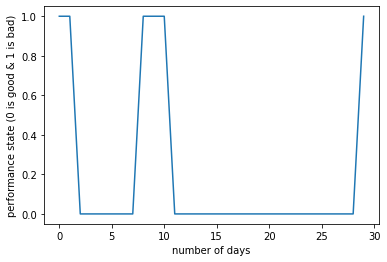

In [31]:
#for k = 1
plt.plot(test_k1[test_k1['cell_name_anon']=='cell-5075']['gt_mu+1sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

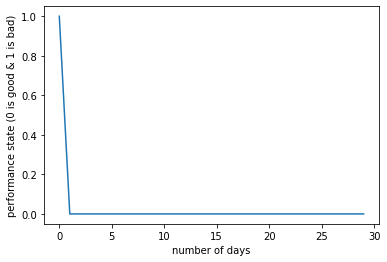

In [32]:
#for k = 1.5
plt.plot(test_k15[test_k15['cell_name_anon']=='cell-5075']['gt_mu+1.5sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

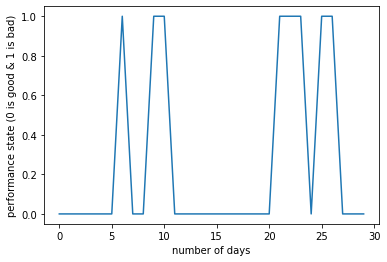

In [33]:
#for k = 1
plt.plot(test_k1[test_k1['cell_name_anon']=='cell-5077']['gt_mu+1sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

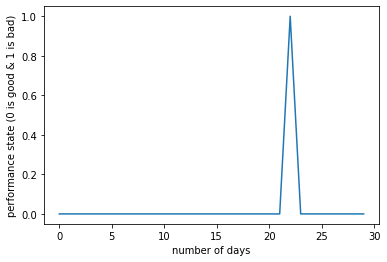

In [34]:
#for k = 1.5
plt.plot(test_k15[test_k15['cell_name_anon']=='cell-5077']['gt_mu+1.5sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

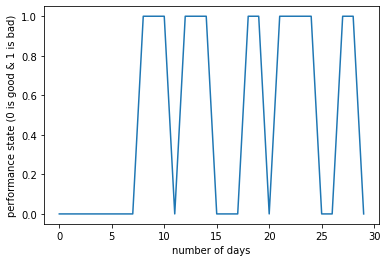

In [35]:
#for k = 1
plt.plot(test_k1[test_k1['cell_name_anon']=='cell-5079']['gt_mu+1sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

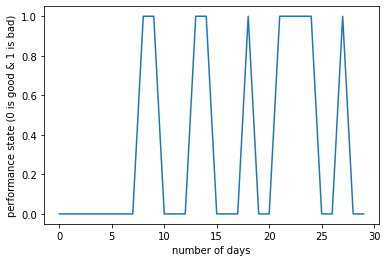

In [36]:
#for k = 1.5
plt.plot(test_k15[test_k15['cell_name_anon']=='cell-5079']['gt_mu+1.5sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

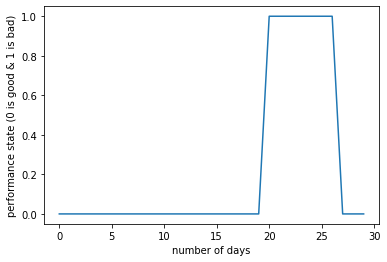

In [37]:
#for k = 1
plt.plot(test_k1[test_k1['cell_name_anon']=='cell-5128']['gt_mu+1sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

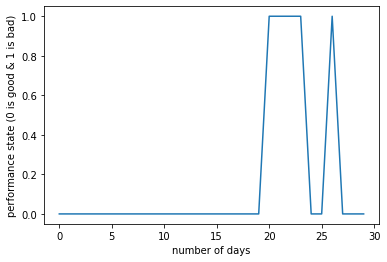

In [38]:
#for k = 1.5
plt.plot(test_k15[test_k15['cell_name_anon']=='cell-5128']['gt_mu+1.5sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

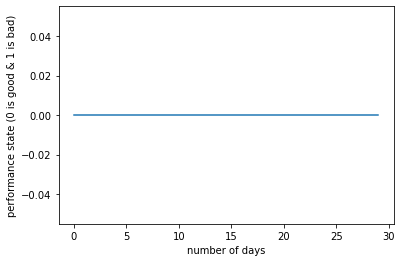

In [39]:
#for k = 1
plt.plot(test_k1[test_k1['cell_name_anon']=='cell-5116']['gt_mu+1sigma'].values)
plt.xlabel('number of days')
plt.ylabel('performance state (0 is good & 1 is bad)')
plt.show()

In [40]:
test_k05.head(5)

,cell_name_anon,band,mean_score_90days,date,rank,percentile,score_mean_good_days,score_std_90days,score_mean_90days,mu+0.5sigma,mu-0.5sigma,gt_mu+0.5sigma,lt_mu-0.5sigma
0,cell-5073,band2100,1.65,2019-01-11,4003,1.21,0.52,0.45,0.77,0.74,0.29,True,False
1,cell-5073,band2100,1.58,2019-01-12,4005,1.16,0.52,0.45,0.77,0.74,0.29,True,False
2,cell-5073,band2100,1.56,2019-01-13,4003,1.21,0.52,0.45,0.77,0.74,0.29,True,False
3,cell-5073,band2100,1.53,2019-01-14,3999,1.31,0.52,0.45,0.77,0.74,0.29,True,False
4,cell-5073,band2100,1.46,2019-01-15,3993,1.46,0.52,0.45,0.77,0.74,0.29,True,False


In [41]:
#watching the mean percentile for a random cell
build_k05[build_k05.cell_name_anon == 'cell-5073'].groupby('cell_name_anon')['percentile'].mean()[0]

6.229980020206762

In [42]:
#calculate percentile drops for k=0.5
row=0
count=0
pct_change_k05 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k05[test_k05['gt_mu+0.5sigma']==True].cell_name_anon.unique():
    tmp = test_k05[test_k05.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k05[build_k05.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k05 = pct_change_k05.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k05['total'].mean(),pct_change_k05['total'].median(),pct_change_k05['total'].std())

-0.15245480542817516 -0.232673383744057 8.684541114017726


In [43]:
#calculate percentile drops for k=1
row=0
count=0
pct_change_k1 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k1[test_k1['gt_mu+1sigma']==True].cell_name_anon.unique():
    tmp = test_k1[test_k1.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k1[build_k1.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k1 = pct_change_k1.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k1['total'].mean(),pct_change_k1['total'].median(),pct_change_k1['total'].std())

-0.8384068899200345 -0.7502457834851175 8.298746121053748


In [44]:
#calculate percentile drops for k=1.5
row=0
count=0
pct_change_k15 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k15[test_k15['gt_mu+1.5sigma']==True].cell_name_anon.unique():
    tmp = test_k15[test_k15.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k15[build_k15.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k15 = pct_change_k15.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k15['total'].mean(),pct_change_k15['total'].median(),pct_change_k15['total'].std())

-2.5162587322548746 -2.0470501886605335 7.913671520949464


In [45]:
#calculate percentile drops for k=2
row=0
count=0
pct_change_k2 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k2[test_k2['gt_mu+2sigma']==True].cell_name_anon.unique():
    tmp = test_k2[test_k2.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k2[build_k2.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k2 = pct_change_k2.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k2['total'].mean(),pct_change_k2['total'].median(),pct_change_k2['total'].std())

-4.415566971439253 -3.613876401275375 7.915766008151042


In [46]:
#calculate percentile drops for k=2.5
row=0
count=0
pct_change_k25 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k25[test_k25['gt_mu+2.5sigma']==True].cell_name_anon.unique():
    tmp = test_k25[test_k25.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k25[build_k25.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k25 = pct_change_k25.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k25['total'].mean(),pct_change_k25['total'].median(),pct_change_k25['total'].std())

-6.231221067053014 -5.139999770543226 8.337282291786149


In [47]:
#calculate percentile drops for k=3
row=0
count=0
pct_change_k3 = pd.DataFrame(columns = {'total','cell_name','count'})
for cell in test_k3[test_k3['gt_mu+3sigma']==True].cell_name_anon.unique():
    tmp = test_k3[test_k3.cell_name_anon==cell]
    idx = list(tmp.index)
    idx.pop()
    instances = len(idx)
    pct=[]
    percentile = build_k3[build_k3.cell_name_anon == cell].groupby('cell_name_anon')['percentile'].mean()[0]
    for i in idx:
        pct.append(tmp.loc[i+1,'percentile']-percentile)
        count+=1
    #print(list((cell,float(np.std(pct)),float(np.median(pct)),float(np.mean(pct)),instances)))
    pct_change_k3 = pct_change_k3.append({'total':np.mean(pct),'cell_name':cell,'count':count},ignore_index=True)
    row+=1
del(tmp,percentile,idx,pct)
print(pct_change_k3['total'].mean(),pct_change_k3['total'].median(),pct_change_k3['total'].std())

-7.886511750185671 -6.213284977914521 9.198018198752214


In [48]:
test_k05[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+0.5sigma','mu-0.5sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k05_feb.csv')
test_k1[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+1sigma','mu-1sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k1_feb.csv')
test_k15[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+1.5sigma','mu-1.5sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k15_feb.csv')
test_k2[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+2sigma','mu-2sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k2_feb.csv')
test_k25[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+2.5sigma','mu-2.5sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k25_feb.csv')
test_k3[['cell_name_anon','mean_score_90days','percentile','date','score_mean_good_days','score_std_90days','mu+3sigma','mu-3sigma']].to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\test_k3_feb.csv')


In [49]:
#making the changes dataFrame for the cells on the days having low performance
test_k15.date = pd.to_datetime(test_k15.date)
x = test_k15[test_k15['gt_mu+1.5sigma']==True][['cell_name_anon','date']]
x.date = x.date - dt.timedelta(days=1)
changes_df = test_k15[test_k15['gt_mu+1.5sigma']==True].append(pd.merge(test_k15,x,how='inner',on=['cell_name_anon','date']))
changes_df.sort_values(by=['cell_name_anon','date'],inplace=True)
changes_df.drop_duplicates(inplace = True)
changes_df.reset_index(inplace=True,drop=True)
index = list(changes_df.index)
true_to_go = []
index.pop()
for i in index:
    if(changes_df.loc[i,'gt_mu+1.5sigma'] == True) & (changes_df.loc[i+1,'gt_mu+1.5sigma'] == True):
        true_to_go.append(i+1)
changes_df.drop(true_to_go,axis=0,inplace=True)
changes_df.sort_values(by=['cell_name_anon','date'],inplace=True)
print(changes_df.shape)
print(changes_df[changes_df['gt_mu+1.5sigma']==True].shape)
del(true_to_go,x,i,index)

(10585, 13)
(5293, 13)


In [50]:
features = ['call_count',
'est_count_handover',
'vsDataEUtranCellFDD..crsGain',
'feature_HoOscCtrlUE',
'feature_AdvancedDiffForResourceFairSch',
'vsDataENodeBFunction..dlBbCapacityNet',
'feature_Support18Cells',
'vsDataEUtranCellFDD..qRxLevMin',
'feature_MixedModeRadioLte',
'vsDataENodeBFunction..ulBbCapacityNet',
'feature_QuadAntUlPerfPkg',
'vsDataEUtranCellFDD..pdcchTargetBlerVolte',
'dotw',
'vsDataEUtranCellFDD..lastSchedLinkAdaptEnabled',
'feature_QuadAntDlPerfPkg4x4',
'vsDataEUtranCellFDD..threshServingLow',
'vsDataEUtranCellFDD..cellSubscriptionCapacity',
'vsDataEUtranCellFDD..cellCapMinCellSubCap',
'feature_QuadAntDlPerfPkg',
'vsDataEUtranCellFDD..ulSrsEnable',
'feature_PucchOverdimensioning',
'feature_CrossDUCarrierAggregation',
'vsDataENodeBFunction..caAwareMfbiIntraCellHo',
'vsDataEUtranCellFDD..pZeroNominalPusch',
'vsDataEUtranCellFDD..transmissionMode',
'vsDataEUtranCellFDD..cellDownlinkCaCapacity',
'feature_UlTrigInterFreqMob',
'feature_VoLTEOptimizedCA',
'vsDataEUtranCellFDD..puschPwrOffset64qam',
'feature_Support24Cells',
'feature_SrvccToUtran',
'feature_CsfbForLimitedDualRadioUe',
'feature_FourDlCarrierAggregation',
'feature_FddTddSameENodeB',
'vsDataEUtranCellFDD..ulConfigurableFrequencyStart',
'feature_CarrierAggregationFddTdd',
'qciProfile..tReorderingDl',
'feature_RelInactiveUeAtHighLoadHo',
'vsDataENodeBFunction..enabledUlTrigMeas',
'feature_PdcchPowerBoost',
'vsDataEUtranCellFDD..qQualMin',
'vsDataENodeBFunction..mfbiSupport',
'feature_ConfigurableScellPrio',
'feature_UlSpectrumAnalyzer',
'vsDataEUtranCellFDD..tReorderingAutoConfiguration',
'vsDataEUtranCellFDD..additionalPlmnList_mcc_enc',
'vsDataENodeBFunction..timeAndPhaseSynchCritical',
'vsDataEUtranCellFDD..outOfCoverageSrTimerPeriodicity',
'feature_MultiFreqBand',
'qciProfile..dlMaxHARQTxQci','cell_name_anon','date']

In [51]:
#taking the cm data to a table cm_data
chunksize = 10 ** 7
cm_data = pd.DataFrame()

for chunk in pd.read_csv(r'C:\Users\ezchave\Desktop\New_data_rankprct\band2100_dataset_A.csv', chunksize=chunksize):
    #chunk = chunk[['features']]
    chunk = chunk.reindex(columns = features)
    cm_data = cm_data.append(chunk)
    
    
for chunk in pd.read_csv(r'C:\Users\ezchave\Desktop\New_data_rankprct\band2100_dataset_B.csv', chunksize=chunksize):
    #chunk = chunk[['features']]
    chunk = chunk.reindex(columns = features)
    cm_data = cm_data.append(chunk)
    
del(chunk,chunksize)

C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (257,258,297,308,309,314,315,325,328,331,343,344,345,347,352,359,372,373,400,402,416,423,445,446,447,456,457,469,475,480,495,501,503,509,511,514,516,517,521,523,524,525,526,527,538,551,552,586,592,612,613,629,630,631,647,648,649,667,671,672,673,685,694,695,703,704,708,709,710) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ezchave\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (252,253,292,303,304,309,310,320,323,326,338,339,340,342,347,354,367,368,395,397,411,418,440,441,442,451,452,464,470,475,490,496,498,504,506,509,511,512,516,518,519,520,521,522,533,546,547,581,587,607,608,624,625,626,642,643,644,662,666,667,668,680,689,690,698,699,703,704,705) have mixed types. Specify dtype option on imp

In [52]:
def get_deviation_df(test_k,cm_data,k):
    #this is the function to get data only for the day of deviation and the day before
    # and the inceident data of the same days
    #test_k = test dataframe generated before
    #cm_data is the dataframe of the cm counters
    #k is the value of k in the test dataframe sent above
    #test_k=test_k15.copy()
    #k=1.5
    test_k.date = pd.to_datetime(test_k.date)
    x = test_k[test_k['gt_mu+'+str(k)+'sigma']==True][['cell_name_anon','date']]
    y = x.copy()
    x.date = x.date - dt.timedelta(days=1)
    y=y.append(x)
    y.reset_index(inplace=True)
    changes_df = test_k[test_k['gt_mu+'+str(k)+'sigma']==True].append(pd.merge(test_k,x,how='inner',on=['cell_name_anon','date']))
    changes_df.sort_values(by=['cell_name_anon','date'],inplace=True)
    changes_df.drop_duplicates(inplace = True)
    changes_df.reset_index(inplace=True,drop=True)
    index = list(changes_df.index)
    true_to_go = []
    index.pop()
    for i in index:
        if(changes_df.loc[i,'gt_mu+'+str(k)+'sigma'] == True) & (changes_df.loc[i+1,'gt_mu+'+str(k)+'sigma'] == True):
            true_to_go.append(i+1)
    changes_df.drop(true_to_go,axis=0,inplace=True)
    changes_df.sort_values(by=['cell_name_anon','date'],inplace=True)
    #print(changes_df.shape)
    #print(changes_df[changes_df['gt_mu+'+str(k)+'sigma']==True].shape)
    #del(true_to_go,x,i,index)
    cm_data.date = pd.to_datetime(cm_data.date)
    changes_cm = pd.DataFrame()
    changes_df = pd.merge(changes_df,df,on=['cell_name_anon','date'],how='inner')
    #print(changes_df.shape)
    changes_cm = pd.merge(changes_df[['cell_name_anon','date']],cm_data,on=['cell_name_anon','date'],how='left')
    
    #print('changes_cm shape : ',changes_cm.shape)
    #print(changes_df.shape)
    changes_df.drop(['band_x'],inplace=True,axis=1)
    changes_df.rename(columns={'band_y':'band','call_count_y':'call_count','est_count_handover_y':'est_count_handover'},inplace=True)
    changes_cm['unique'] = changes_cm['cell_name_anon'].astype(str) + changes_cm['date'].astype(str)
    
    to_go = []
    i=0
    while(i<(len(changes_cm.index)-1)):
        date_today,cell_today = changes_cm.loc[i,['date','cell_name_anon']]
        date_tomo,cell_tomo = changes_cm.loc[i+1,['date','cell_name_anon']]
        date_today = date_today + dt.timedelta(days=1)
        if(cell_today == cell_tomo):
            if(date_today!=date_tomo):
                to_go.append((date_today,i,changes_cm.loc[i,'cell_name_anon']))
                i=i+1
            else:
                i=i+2
        else:
            i=i+1
    for i in to_go :
        changes_cm.drop(i[1],axis=0,inplace=True)
    changes_cm.reset_index(inplace=True,drop=True)
    changes_cm.index = changes_cm['unique'] 
    #print('changes_cm shape : ',changes_cm.shape)
    changes_cm.drop(['cell_name_anon','date','unique'],inplace=True,axis=1)
    changes_cm.reset_index(inplace=True)

    #print('changes_cm shape : ',changes_cm.shape)
    #changes_cm.index = changes_cm['unique'].values
    #changes_cm.drop('unique',axis=1,inplace=True)
    #print(changes_cm.head())
    #del(test_k,cm_data,k)
    return changes_cm,changes_df

In [53]:
changes_cm,changes_df = get_deviation_df(test_k15,cm_data,1.5)
changes_df.to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\changes_df_feb.csv')
changes_cm.to_csv(r'C:\Users\ezchave\Desktop\work_no\cell ranking\changes_cm_feb.csv')

In [54]:
def get_nr_deviations (test_k,cm_data,k):
    cm,df=get_deviation_df(test_k,cm_data,k)
    return cm.shape[0]/2
    

In [55]:
#number of deviations for all values of k 
print(get_nr_deviations(test_k05,cm_data,0.5))
print(get_nr_deviations(test_k1,cm_data,1))
print(get_nr_deviations(test_k15,cm_data,1.5))
print(get_nr_deviations(test_k2,cm_data,2))
print(get_nr_deviations(test_k25,cm_data,2.5))
print(get_nr_deviations(test_k3,cm_data,3))

11905.0
9129.0
5222.0
2583.0
1257.0
612.5
